### Бинарная линейная классификация 

#### Теория 

Евклидова мера:
<img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/b85/bd8/e9e/b85bd8e9eef337deaba0f27c25d47a1f.png" width="149" height="80" data-src="https://habrastorage.org/getpro/habr/upload_files/b85/bd8/e9e/b85bd8e9eef337deaba0f27c25d47a1f.png">

[Больше информации про меру](https://ru.wikipedia.org/wiki/Норма_(математика))

Регуляризация:

\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & ||y - Xw||^2 \\
& \text{subject to}
& & ||w||^p_{Lp} < b \\
& \text{where} 
& & ||w||^p = (\sum_{j =1}^{n}|w|^p)^\frac{1}{p} \\
\end{aligned}
\end{equation*}

Задачу можно представить в эквивалентной форме: 

\begin{equation*}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & ||y - Xw||^2 + \lambda ||w||^p \\
& \text{where} 
& & \lambda > 0\\
\end{aligned}
\end{equation*}



#### Перейдем к задачи классификации

Сохраним нашу модель, и потребуем чтобы на выходе она принимала только два значения:

$$a(x_{ij}) = sign(\sum_{j=1}^{n}w_{ij}x_{ij} + w_0),  \forall i \in X$$

Эквивалентная запись 

$$a(x) = sign\langle w, x \rangle$$

Введем понятие отступа (margin):

$$M = y_i \langle w, x \rangle$$

Если $M >0 $ - классификатор прав,  иначе - ошибается

Чем дальше отступ, тем больше уверенность классификатора. Один из выводов, которых можно сделать, что знак отступа и его величина помогает индентифицировать выбросы

Введем понятие порога: 

$$a(x) = sign(\langle w, x \rangle - t) $$

$t$ - порог классификатора

Необходим для того, чтобы можно было оптимизировать функцию потерь под нашу задачу

### Обучение

Сама ошибка имеет достаточно логичный вид - доля верных ответов, но считать его достаточно сложно и непонятно как (функция не дифферинцируема), поэтому использовать методы градиентного спуска не получится, поэтому можно аппроксимировать данную функцию.


1. $\hat L(M) = log(1 + e^-m)$ - логистическая фунукция
2. $\hat L(M) = max(0, 1-M)$ - кусочно-линейная
3. $\hat L(M) = e^-M$ - экспонециальная

### Метрики 

1. Accuracy
2. Precision, Recall 
3. AUC-ROC
4. Confusion matrix
5. F-мера


#### Заметки 

1. Веса можно интерпретировать, как вклад признака в уверенность модели к какому классу относить. Или же насколько сильно признак влияет на отнесении к тому или иному классу

2. Жесткая классификация - значение, мягкая классификация - вероятности


----

### Практическая часть 

Задача кредитного скоринга

[Данными клиентов банка](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) (задача кредитного скоринга).
Значение признаков:
* account: банковский счет (-1: отриц. баланс, 0: нет счета, 1: до 200 ед., 2: более 200 ед.)
* duration: на какой период запрашивают кредит
* credit_history: рейтинг по кредитной истории (от 0 - отличная кр. история до 4 - критическая ситуация с кредитами)
* amount: на какую сумму запрашивают кредит
* savings: сберегательный счет (0: нет, 1: < 100, 2: 100 <= ... < 500, 3: 500 <= ... < 1000, 4:  >= 1000)
* employment: срок работы на текущей позиции (0: не работает, 1: до 1 года, 2: от 1 до 4 лет, 3: от 4 до 7 лет, 4: более 7 лет)
* guarantors: 1 - есть поручители, 0 - нет
* residence:  сколько лет резидент
* age: возраст, деленный на 100
* credits_number: число кредитов
* job: 0: не работает, 1: неквалифицированный, 2: квалифицированный специалист, 3: высокая должность или бизнес
* maintenance_people: число людей, которых обеспечивает заемщик
* telephone: указан ли телефон (1: да, 0: нет)
* foreign: 1: иностранец, 0: нет
* real_estate: 1: есть недвижимость, 0: нет недвижимости
* life_insurance: 1: оформлено страхование жизни, 0, нет страховки
* car: 1: есть автомобиль, 0: нет автомобиля
* housing_rent: 1: платит за съем жилья, 0: не платит за съем жилья
* sex: пол - 1: муж., 0: жен.
* purpose: на какую цель запрашивают кредит (из нескольких вариантов)
* target: 1: кредит выдан, 0: в кредите отказано


In [1]:
import pandas as pd

In [4]:
tab = pd.read_excel("https://github.com/nadiinchi/voronovo_seminar_materials/blob/master/base_track/seminars/scoring.xls?raw=true")

In [6]:
tab

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,maintenance_people,telephone,foreign,real_estate,life_insurance,car,housing_rent,sex,purpose,target
0,1,0.18,2,0.13110,2,2,1,4,0.34,1,...,1,0,1,0,0,1,0,1,business,1
1,-1,0.18,0,0.15520,1,3,1,1,0.31,1,...,1,1,1,0,1,0,0,1,business,1
2,-1,0.12,2,0.04510,1,3,1,4,0.21,1,...,1,0,1,0,1,0,1,1,retraining,0
3,-1,0.30,0,0.40360,0,1,1,3,0.25,3,...,1,0,1,0,0,1,0,1,business,1
4,0,0.36,2,0.09095,1,2,1,4,0.37,1,...,1,1,1,0,0,0,0,1,education,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,0.09,2,0.02290,1,2,1,3,0.24,1,...,1,0,1,1,0,0,0,1,television,1
596,0,0.48,2,0.24220,1,0,1,2,0.33,1,...,1,1,1,0,0,1,1,1,business,0
597,1,0.24,3,0.09825,0,2,1,4,0.42,2,...,1,1,1,0,0,1,1,0,car_new,1
598,0,0.18,1,0.32290,1,4,1,4,0.39,2,...,2,1,1,0,0,0,0,1,car_new,0


In [7]:
tab.dtypes # типы столбцов

account                 int64
duration              float64
credit_history          int64
amount                float64
savings                 int64
employment              int64
guarantors              int64
residence               int64
age                   float64
credits_number          int64
job                     int64
maintenance_people      int64
telephone               int64
foreign                 int64
real_estate             int64
life_insurance          int64
car                     int64
housing_rent            int64
sex                     int64
purpose                object
target                  int64
dtype: object

In [8]:
tab["target"].value_counts()

1    300
0    300
Name: target, dtype: int64

Классы сбалансированны

### Smote - метод для балансировки классов

#### Работа с данными

In [9]:
X = tab[tab.columns[:-2]]
y = tab["target"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Модель

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score 

In [14]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = clf_lr.predict(X_test)


Порог: $t = 0.5$

In [21]:
accuracy_score(y_test, y_pred > 0.5)

0.6388888888888888

#### Важность весов

In [37]:
import numpy as np

In [38]:
a = pd.DataFrame(X.columns, columns=["name"])
b = pd.DataFrame(np.abs(clf_lr.coef_), columns=['coeff'])
c  =pd.concat([a, b], axis=1)
c.sort_values("coeff")

,name,coeff
10,job,0.000997
7,residence,0.001096
11,maintenance_people,0.005694
6,guarantors,0.009754
15,life_insurance,0.013474
12,telephone,0.017358
8,age,0.018582
3,amount,0.020666
4,savings,0.030674
0,account,0.033446


Интепретировать весе возможно только когда данные отнормированные, иначе модуль веса будет зависеть от масштаба признака

#### Работа с категориальными признаками

In [39]:
tab.purpose.value_counts()

car_new                157
television             143
furniture              118
business                61
car_used                57
education               31
repairs                 13
others                  10
domestic_appliances      8
retraining               2
Name: purpose, dtype: int64

In [41]:
tab_one = pd.get_dummies(tab, "purpose")

In [42]:
tab_one.sample(10)

,account,duration,credit_history,amount,savings,employment,guarantors,residence,age,credits_number,...,purpose_business,purpose_car_new,purpose_car_used,purpose_domestic_appliances,purpose_education,purpose_furniture,purpose_others,purpose_repairs,purpose_retraining,purpose_television
514,-1,0.47,2,0.53610,1,1,1,1,0.35,1,...,0,1,0,0,0,0,0,0,0,0
29,1,0.18,2,0.64880,1,0,1,4,0.38,1,...,0,0,1,0,0,0,0,0,0,0
596,0,0.48,2,0.24220,1,0,1,2,0.33,1,...,1,0,0,0,0,0,0,0,0,0
323,1,0.12,2,0.30390,1,3,1,2,0.32,1,...,0,1,0,0,0,0,0,0,0,0
398,-1,0.06,4,0.03330,4,3,1,4,0.39,2,...,0,1,0,0,0,0,0,0,0,0
499,1,0.15,2,0.13155,2,2,1,2,0.25,1,...,0,0,0,0,0,0,0,1,0,0
82,-1,0.06,2,0.06870,0,0,1,3,0.75,1,...,0,1,0,0,0,0,0,0,0,0
356,0,0.12,4,0.06200,0,4,1,2,0.38,2,...,0,0,0,0,0,0,0,0,0,1
538,0,0.21,2,0.11205,1,4,1,2,0.50,2,...,0,0,0,0,0,1,0,0,0,0
319,0,0.24,2,0.22955,4,2,1,3,0.54,3,...,1,0,0,0,0,0,0,0,0,0


In [43]:
X_ohe = tab_one.drop("target", axis=1)

In [44]:
X_train_ohe, X_test_ohe, y_train, y_test  = train_test_split(X_ohe, y, \
                                                     test_size=0.3,\
                                                     shuffle=True,
                                                     random_state=0)

In [45]:
scaler = StandardScaler()
X_train_ohe = scaler.fit_transform(X_train_ohe)
X_test_ohe = scaler.transform(X_test_ohe)

In [46]:
def get_accuracy(clf):
    clf.fit(X_train_ohe, y_train)
    y_pred = clf.predict(X_test_ohe)
    return accuracy_score(y_test, y_pred > 0.5)

In [47]:
print(get_accuracy(LinearRegression()))

0.6666666666666666


Recall = TPR = Sensitivity

$FPR = \frac{FP}{FP+TN$} $ - доля ошибок на отрицательном классе

(1 - FPR) - specificity -  доля правильных ответов на отрицательно классе

F-мера - среднеегармоническое на pr и re: $$\frac{(1+\beta^2) \cdot Pr \cdot Re}{\beta^2 \cdot Pr + Re }$$



In [49]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [50]:
confusion_matrix(y_test, y_pred > 0.5)

array([[53, 49],
       [16, 62]], dtype=int64)

In [53]:
precision_score(y_test, y_pred >0.5), recall_score(y_test, y_pred > 0.5), f1_score(y_test, y_pred >0.5)

(0.5585585585585585, 0.7948717948717948, 0.656084656084656)

In [54]:
import matplotlib.pyplot as plt 

In [81]:
prec = []
rec = []
F = []
step = []
for i in range(11):
    t = i/10
    prec.append(precision_score(y_test, y_pred > t))
    rec.append(recall_score(y_test, y_pred > t))
    F.append(f1_score(y_test, y_pred > t))
    step.append(t)

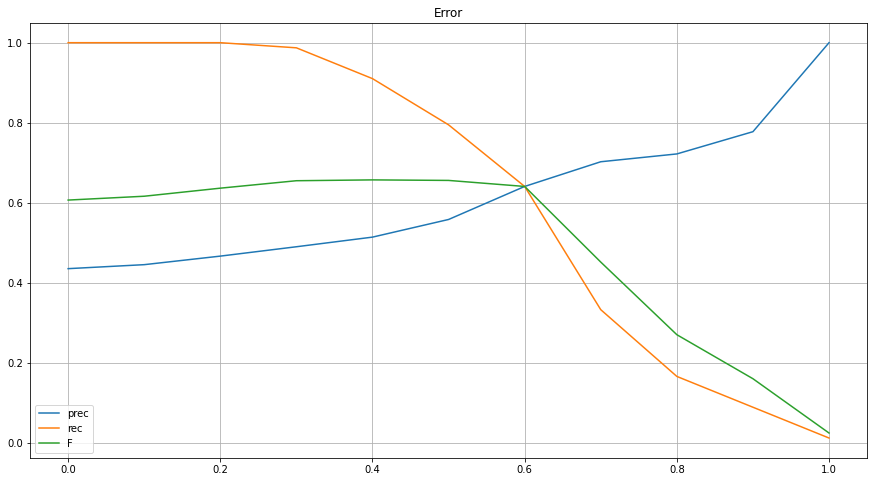

In [85]:
plt.figure(figsize=(15,8))
plt.plot(step, prec, label = "prec")
plt.plot(step, rec, label="rec")
plt.plot(step, F, label="F")
plt.grid()
plt.title("Error")
plt.legend()


In [86]:
step[np.argmax(F)]

0.4

### Регуляризация

In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

alphas = np.arange(0.1, 15, 1)
scores = []
for alpha in alphas:
    kf = KFold(5)
    lr = Ridge(alpha = alpha)
    cv_scores = []
    for tr_ind, test_ind, in kf.split(X_train):
        X_tr, X_ts = X_train[tr_ind, :], X_train[test_ind, :]
        y_tr, y_ts = np.array(y_train)[tr_ind], np.array(y_train)[test_ind]
        lr.fit(X_tr, y_tr)
        cv_scores.append(f1_score(y_ts, lr.predict(X_ts) > 0.4))
        
    scores.append(np.mean(cv_scores))

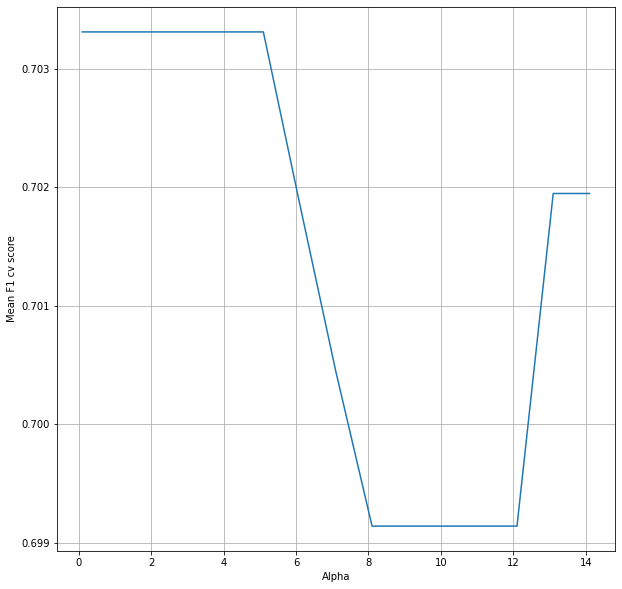

In [102]:
plt.figure(figsize=(10,10))
plt.plot(alphas, scores)
plt.ylabel("Mean F1 cv score")
plt.xlabel("Alpha")
plt.grid()